In [3]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('ds_chall.csv', parse_dates=['date'])
df["date"] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

df.head()

,cc_num,job,age,gender,date,HOM_total,HOM_total_freq,HOM_entertainment,HOM_entertainment_freq,HOM_food_dining,...,HOM_misc_pos,HOM_misc_pos_freq,HOM_personal_care,HOM_personal_care_freq,HOM_shopping_net,HOM_shopping_net_freq,HOM_shopping_pos,HOM_shopping_pos_freq,HOM_travel,HOM_travel_freq
0,4383521454815,Academic librarian,33,1,2019-01-15,884.03,22,0.00,0,0.00,...,40.29,2,35.40,2,3.75,2,16.09,2,33.42,2
1,4383521454815,Academic librarian,33,1,2019-01-28,657.03,14,46.66,2,245.12,...,8.12,1,0.00,0,0.00,0,45.37,2,0.00,0
2,4383521454815,Academic librarian,33,1,2019-02-15,548.53,17,150.59,3,20.73,...,0.00,0,0.00,0,0.00,0,4.64,1,0.00,0
3,4383521454815,Academic librarian,33,1,2019-02-28,951.26,19,31.10,1,35.67,...,7.49,3,0.00,0,0.00,0,0.00,0,0.00,0
4,4383521454815,Academic librarian,33,1,2019-03-15,1164.12,24,73.00,2,115.60,...,0.00,0,43.73,1,0.00,0,1.18,1,0.00,0


In [4]:
def plot_df(x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


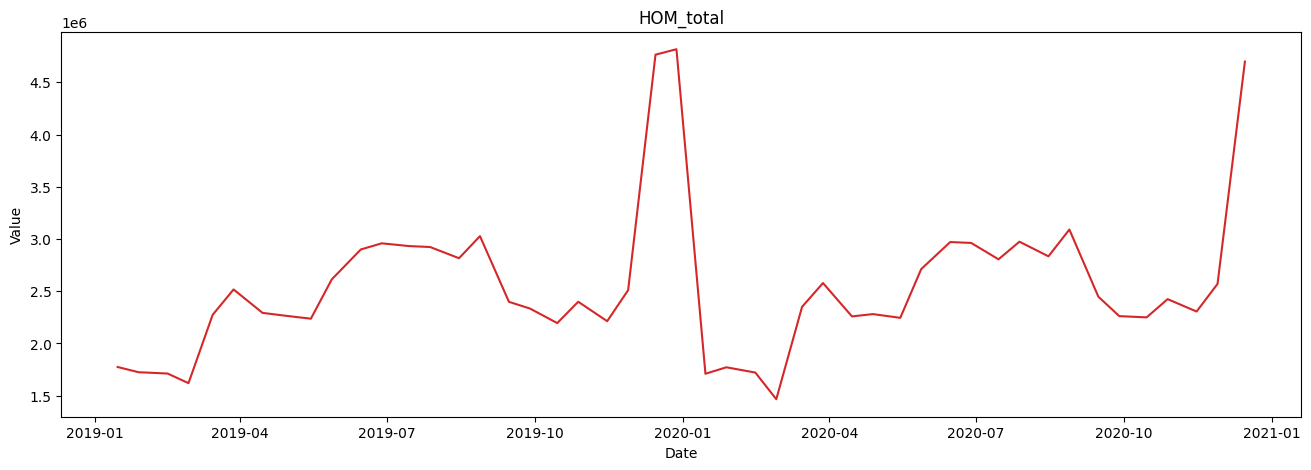

In [6]:
def plot_col(col):
    
    frame = df[[col, 'date']].groupby('date').sum()
    plot_df(x=frame[col].index, y=frame[col], title=col)   
plot_col("HOM_total")


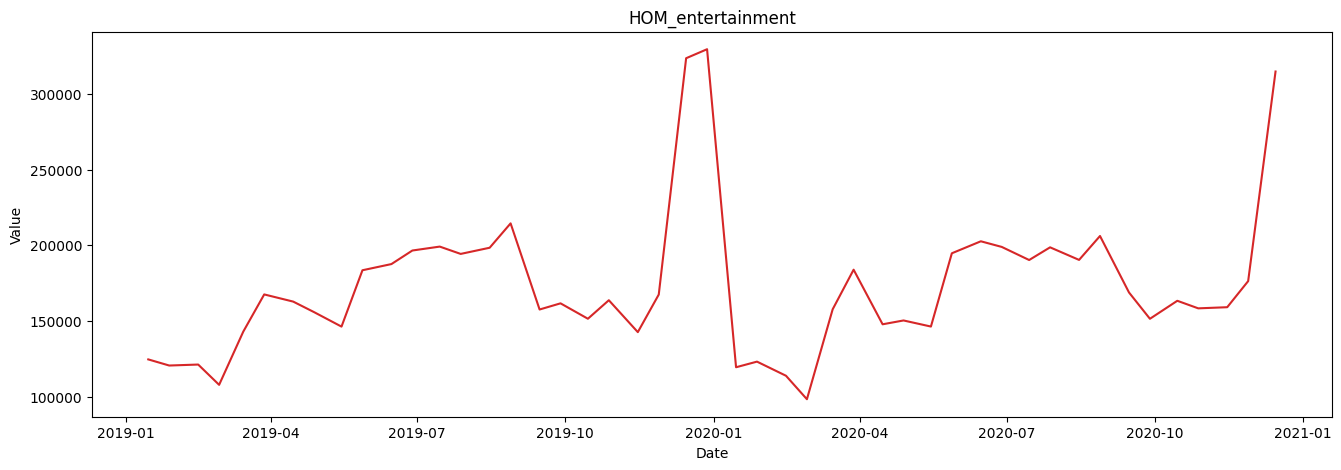

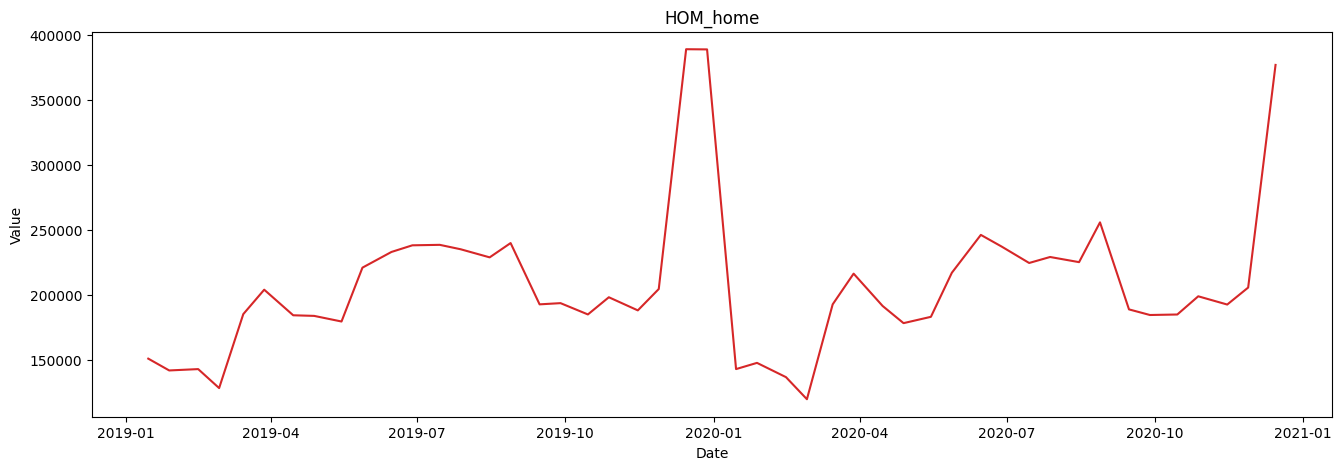

In [7]:
plot_col("HOM_entertainment")
plot_col("HOM_home")

In [8]:
#df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42676 entries, 0 to 42675
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cc_num                   42676 non-null  int64         
 1   job                      42676 non-null  object        
 2   age                      42676 non-null  int64         
 3   gender                   42676 non-null  int64         
 4   date                     42676 non-null  datetime64[ns]
 5   HOM_total                42676 non-null  float64       
 6   HOM_total_freq           42676 non-null  int64         
 7   HOM_entertainment        42676 non-null  float64       
 8   HOM_entertainment_freq   42676 non-null  int64         
 9   HOM_food_dining          42676 non-null  float64       
 10  HOM_food_dining_freq     42676 non-null  int64         
 11  HOM_gas_transport        42676 non-null  float64       
 12  HOM_gas_transport_freq   42676 n

In [9]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute, make_forecasting_frame
from tsfresh.feature_extraction import ComprehensiveFCParameters, settings

ModuleNotFoundError: No module named 'tsfresh'

In [ ]:
df_pass, y_air = make_forecasting_frame(df["HOM_total"], kind="HOM_total", max_timeshift=12, rolling_direction=1)
print(df_pass)

Rolling: 100%|██████████| 30/30 [01:20<00:00,  2.69s/it]


                 id   time    value       kind
36999       (id, 1)      0  2904.31  HOM_total
37001       (id, 2)      0  2904.31  HOM_total
37002       (id, 2)      1  5513.39  HOM_total
37004       (id, 3)      0  2904.31  HOM_total
37005       (id, 3)      1  5513.39  HOM_total
...             ...    ...      ...        ...
554704  (id, 42675)  42670   996.13  HOM_total
554705  (id, 42675)  42671   621.74  HOM_total
554706  (id, 42675)  42672  1876.81  HOM_total
554707  (id, 42675)  42673   626.29  HOM_total
554708  (id, 42675)  42674   648.02  HOM_total

[512034 rows x 4 columns]


In [ ]:
type(df_pass)
df_pass.head()

,id,time,value,kind
36999,"(id, 1)",0,2904.31,HOM_total
37001,"(id, 2)",0,2904.31,HOM_total
37002,"(id, 2)",1,5513.39,HOM_total
37004,"(id, 3)",0,2904.31,HOM_total
37005,"(id, 3)",1,5513.39,HOM_total


In [ ]:
data = df[["HOM_total", 'Date']].groupby('Date').sum()
data['date'] = data.index
data

,HOM_total,date
Date,,
2019-01-15,1773960.80,2019-01-15
2019-01-30,1724008.85,2019-01-30
2019-02-15,1711410.52,2019-02-15
2019-03-15,2273626.08,2019-03-15
2019-03-30,2516622.73,2019-03-30
2019-04-15,2292247.53,2019-04-15
2019-04-30,2267189.76,2019-04-30
2019-05-15,2236573.61,2019-05-15
2019-05-30,2613780.60,2019-05-30


In [ ]:
df_pass, y_air = make_forecasting_frame(data["HOM_total"], kind="HOM_total", max_timeshift=50, rolling_direction=-2)

C:\Users\User\anaconda3\lib\site-packages\tsfresh\utilities\dataframe_functions.py:456: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn("Your time stamps are not uniformly sampled, which makes rolling "
Rolling: 100%|██████████| 23/23 [00:04<00:00,  4.92it/s]


In [ ]:
print(df_pass.shape, data.shape)


(506, 4) (45, 2)


In [ ]:
predicted = df_pass.groupby('time').mean()
predicted['date'] = predicted.index
predicted

,value,date
time,,
2019-01-15,1773960.80,2019-01-15
2019-01-30,1724008.85,2019-01-30
2019-02-15,1711410.52,2019-02-15
2019-03-15,2273626.08,2019-03-15
2019-03-30,2516622.73,2019-03-30
2019-04-15,2292247.53,2019-04-15
2019-04-30,2267189.76,2019-04-30
2019-05-15,2236573.61,2019-05-15
2019-05-30,2613780.60,2019-05-30


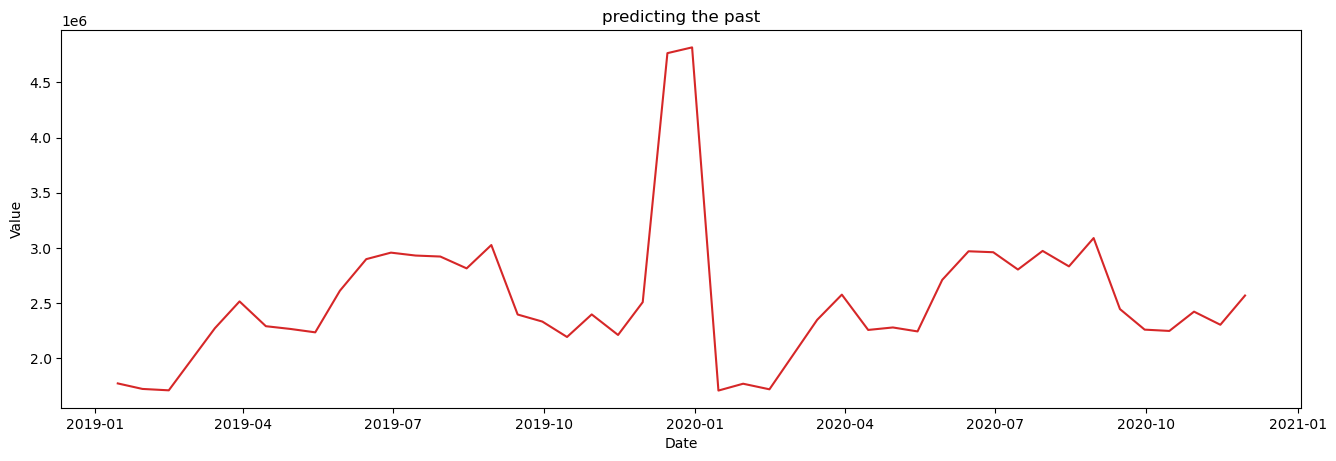

In [ ]:
plot_df(x=predicted["date"], y=predicted["value"], title="Forecast")  